# DSCI 100 Project Report: Using Age and Maximum Heart Rate Achieved as a Predictor for Heart Disease. 

#### Beth Koschel, 

## Introduction

**Background:** Heart disease is a term that encompasses several different types of heart conditions(1). The most common condition is know as coronary artery disease (CAD) which can lead to decreased blood flow to the heart resulting in a heart attack (1). Research has shown that people who are over the age of 65 are more likely than younger people to suffer from heart disease (2). As a prominent cause of mortality in Canada, heart disease underscores the significance of investigating factors that may contribute to its development (3).

**Question:** We want to know if age, sex, and cholesterol levels might play a role in the presence or absence of heart disease.

**ID and Describe the dataset used:** The dataset we are using to answer this question is heart disease dataset from the Cleveland provided to us through the UC Irvine Machine Learning Repository (3). It contains 14 attributes including age, sex, a chest pain scale, resting blood pressure, serum cholesterol, fasting blood sugar levels, resting electrocardiograph results, maximum heart rate achieved, exercise induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels (0-3) colored by fluoroscopy, and diagnosis of heart disease.

## Methods

### Data Pre-processing and Exploratory Data Analysis

EDIT THIS:
Imported libraries and processed.cleveland.data dataset from the internet.

Cleaned and tidied data to make it usable, by assigning column types and adding a new column, diag.

Split the data into training and testing sets, working only with the training set until the very end.

Summarized the training set to make predictions about how we want our classifier to work.

Visualized the relationship between thalac and chol to get a deeper understanding of how the data is distributed.

#### Importing Libraries

In [46]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(ggplot2)
library(dplyr) 


# formatting graphs
options(repr.plot.width = 12, repr.plot.height = 6)

In [47]:
install.packages("kknn")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



#### Importing the Data

The read_csv function was used to import the data (processed.cleveland.data)

In [48]:
# reading the data from data/process.cleveland.data
heart_data <- read_delim("data/processed.cleveland.data", delim=",", col_names = FALSE)

head(heart_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


#### Cleaning and Tidying the Heart Disease Data

##### Setting the Seed

In [49]:
# setting the seed to 1
set.seed(1)

##### Renaming the Columns

In [50]:
set.seed(1)

# renaming the columns
heart_data <- rename(heart_data,
                    age = X1,
                    sex = X2,
                    cp = X3,
                    trestbps = X4,
                    chol = X5,
                    fbs = X6,
                    restecg = X7,
                    thalach = X8,
                    exang = X9,
                    oldpeak = X10,
                    slope = X11,
                    ca = X12,
                    thal = X13,
                    num = X14)
head(heart_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


EXPLAIN FIGURE

##### Removing "?" from the data and replacing it with "NA"

In [51]:
set.seed(1)

# removing "?" from data and replacing it with NA
heart_data[heart_data == "?"] <- NA 
heart_data |> drop_na()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


##### Adding a New Column 

Num needs to be true or false (presence of disease or no presence of disease). Renaming to Diagnosis where 0 means no disease and 1 means disease

In [52]:
set.seed(1)

# adding diagnosis column and setting the values to 'TRUE' if the cell value is > 0 or 'FALSE' if the cell value is 0
heart_data <- heart_data |>
    mutate(diagnosis = as.factor(ifelse(is.na(num), NA, (num > 0))))

##### Switching to Factors

In [53]:
set.seed(1)

# switching column types to factors
heart_clean <- heart_data |>
    select(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, num, diagnosis)
head(heart_clean)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,2,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,1,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0,FALSE


EXPLAIN FIGURE

#### Creating Training and Testing Datasets

ADD TEXT EXPLAINING

In [54]:
set.seed(1)

# splitting dataframe into training and testing datasets
heart_split <- initial_split(heart_clean, prop = 0.75, strata = num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

head(heart_training)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0,FALSE
56,0,2,140,294,0,2,153,0,1.3,2,0,FALSE
57,1,3,150,168,0,0,174,0,1.6,1,0,FALSE
49,1,2,130,266,0,0,171,0,0.6,1,0,FALSE
64,1,1,110,211,0,2,144,1,1.8,2,0,FALSE


EXPLAIN FIGURE

#### Summarizing the Data

EXPLAIN WHY WE ARE DOING THIS

In [55]:
set.seed(1)

# number of male patients in training dataset
male_count <- heart_training |> filter(sex == 1) |> group_by(diagnosis) |> summarize(male = n()) 

#number of female patients in training dataset
female_count <- heart_training |> filter(sex == 0) |> group_by(diagnosis) |> summarize(female = n()) 

# joining the male and female tables
sex_join <- full_join(male_count, female_count)

# getting the patient, count, percentage, min, max, count of male and female patients and mean of each predictor
num_obs <- nrow(heart_training)
heart_summary <- heart_training |> 
    group_by(diagnosis) |>
    summarize(
        num_of_patients = n(),
        percentage = n()/num_obs * 100,
        min_age = min(age),
        max_age = max(age),
        mean_age = mean(age),
        min_chol = min(chol),
        max_chol = max(chol),
        mean_chol = mean(chol)) 

heart_summary <- full_join(heart_summary, sex_join)
heart_summary

Joining with `by = join_by(diagnosis)`
Joining with `by = join_by(diagnosis)`


diagnosis,num_of_patients,percentage,min_age,max_age,mean_age,min_chol,max_chol,mean_chol,male,female
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
FALSE,124,54.86726,29,76,52.68548,126,564,244.2903,70,54
TRUE,102,45.13274,35,77,56.48039,131,409,249.3627,87,15


FIGURE EXPLANATION

#### Relationship Visualization 

EXPLAIN HOW WE DID IT

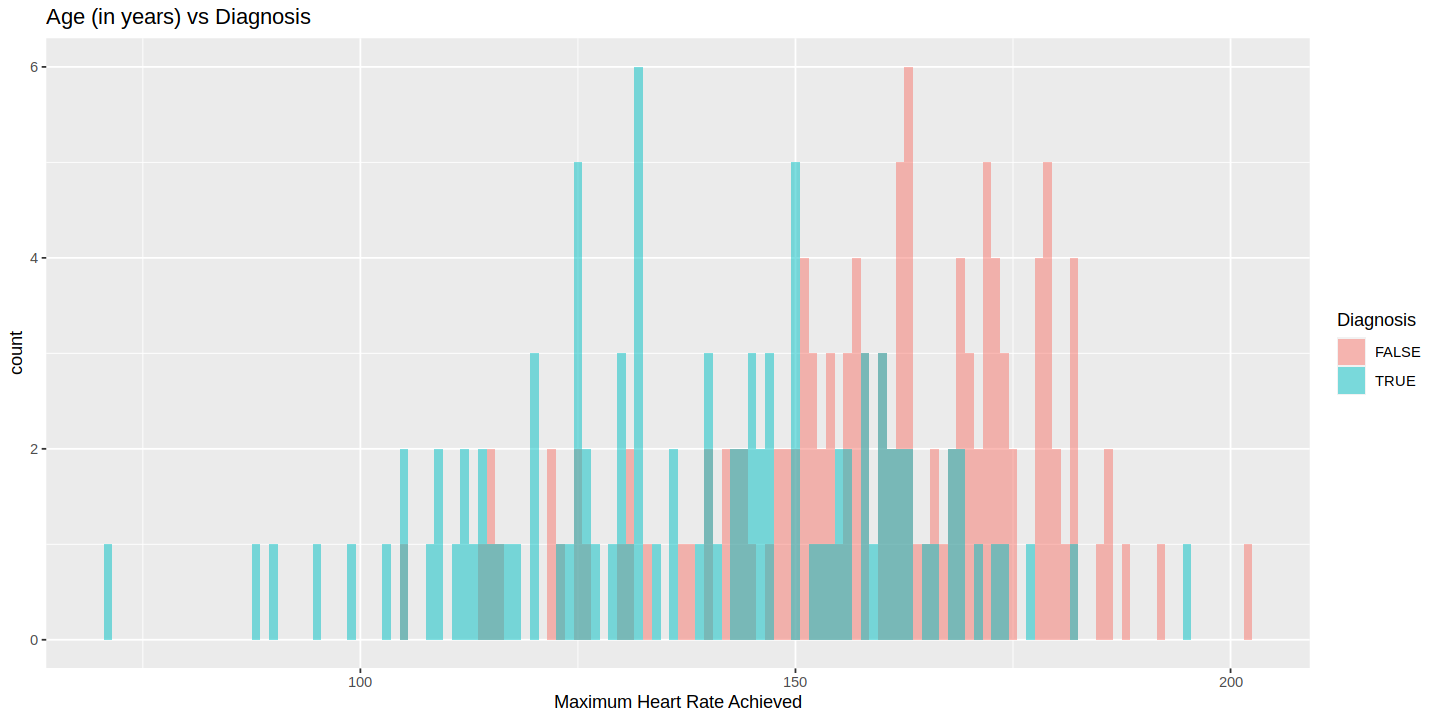

In [78]:
set.seed(1)

#plotting the training data
plot1 <- ggplot(heart_training, aes(x = thalach, fill = diagnosis)) +
  geom_histogram(alpha = 0.5, position = "identity", binwidth = 1) +
    labs(x = "Maximum Heart Rate Achieved", fill = "Diagnosis", title = "Age (in years) vs Diagnosis")
plot1

EXPLAIN FIGURE

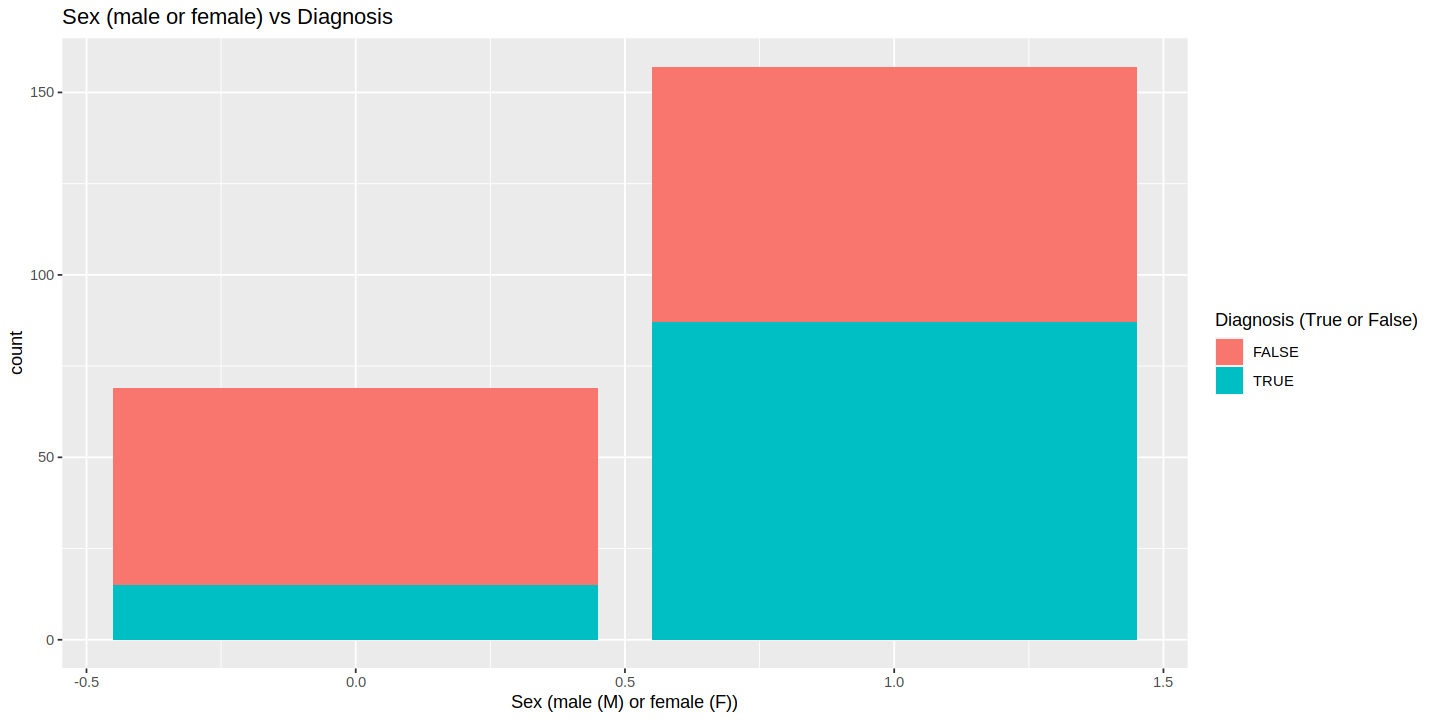

In [70]:
set.seed(1)

# plotting training data
plot2 <- ggplot(heart_training, aes(x = sex, fill = diagnosis)) +
                 geom_bar() +
                 labs(x = "Sex (male (M) or female (F))", fill = "Diagnosis (True or False)", title = "Sex (male or female) vs Diagnosis")
plot2

explain Figure

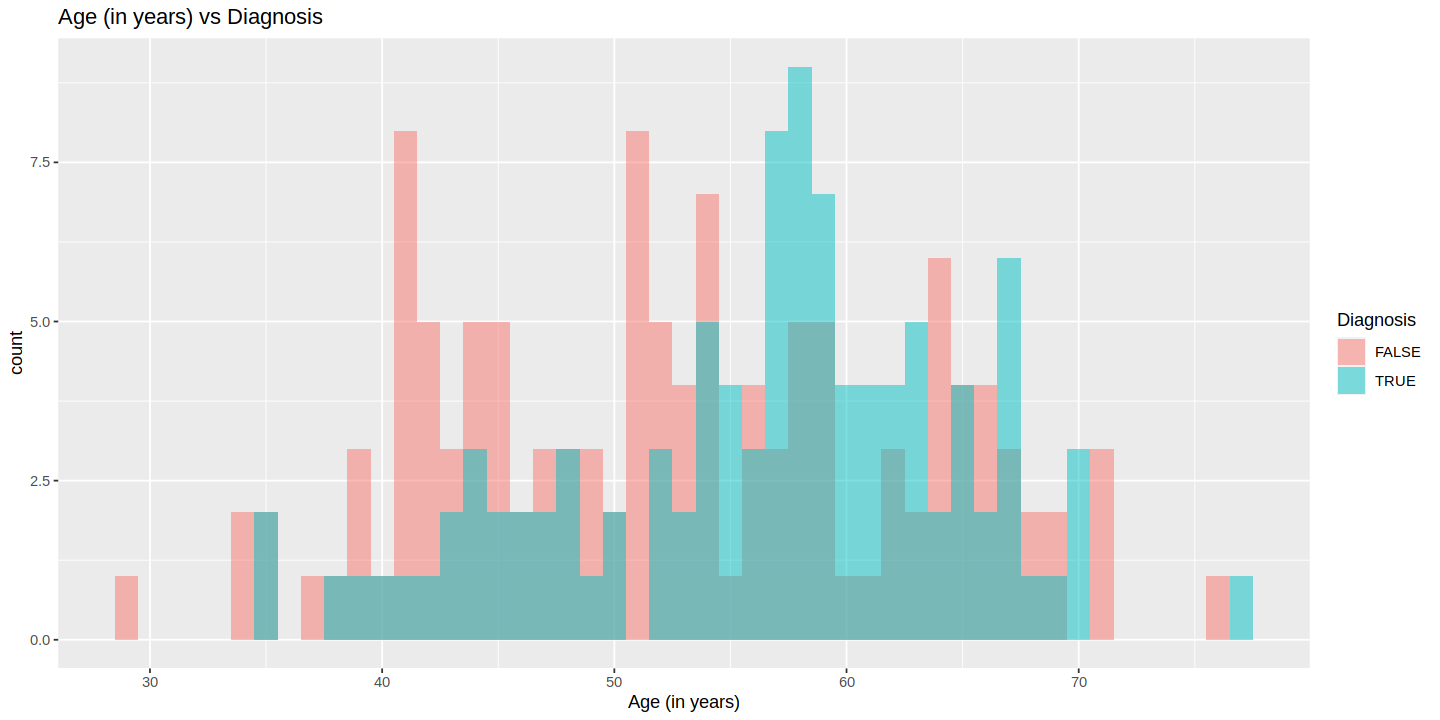

In [69]:
set.seed(1)

#plotting the training data
plot3 <- ggplot(heart_training, aes(x = age, fill = diagnosis)) +
  geom_histogram(alpha = 0.5, position = "identity", binwidth = 1) +
    labs(x = "Age (in years)", fill = "Diagnosis", title = "Age (in years) vs Diagnosis")
plot3

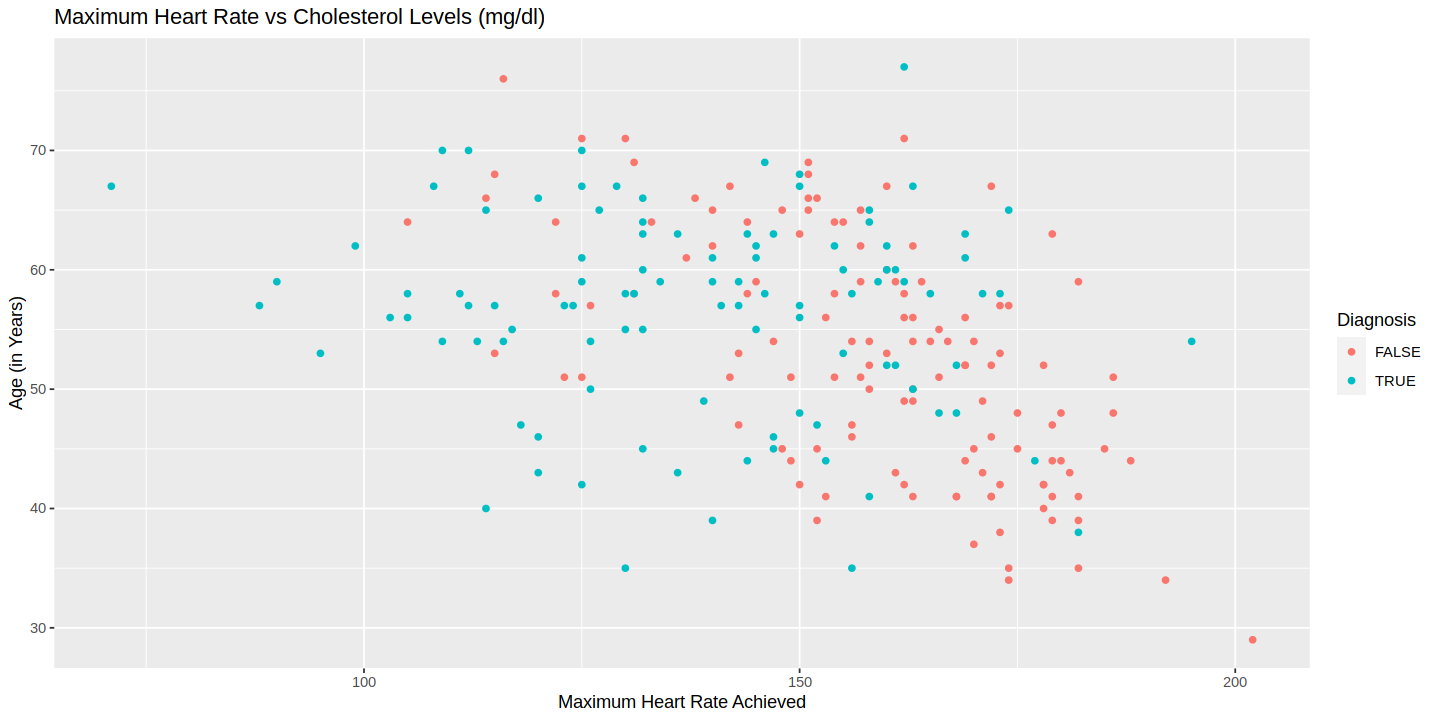

In [76]:
set.seed(1)

# plotting training data
plot1 <- ggplot(heart_training, aes(x = thalach, y = age, color = diagnosis)) +
                 geom_point() +
                 labs(x = "Maximum Heart Rate Achieved", y = "Age (in Years)", color = "Diagnosis", title = "Maximum Heart Rate vs Cholesterol Levels (mg/dl)")
plot1

EXPLAIN FIGURE

FINAL EXPLANATION BEFORE MOVING TO FINDING K VALUE

### Finding Best K Value

#### Creating a Model

EXPLAIN 

In [77]:
set.seed(1)

# K-nearest neighbors model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# standardizing the data
heart_recipe <- recipe(diagnosis ~ thalach + age, data = heart_training) |>
    step_scale(all_predictors()) |>
    step_scale(all_predictors())

heart_vfold <- vfold_cv(heart_training, v = 10, strata = diagnosis)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec) |>
    fit(data = heart_training)

knn_result <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_result |>
    filter(.metric == "accuracy") |>
    select(neighbors, mean) |>
    arrange(desc(mean))
accuracies

Warning message:
“tune samples were requested but there were 226 rows in the data. 221 will be used.”


neighbors,mean
<dbl>,<dbl>
16,0.7220685
41,0.7029480
21,0.7004941
31,0.6991601
11,0.6959486
51,0.6902503
26,0.6815382
36,0.6769928
96,0.6769928


EXPLAIN

EXPLAIN

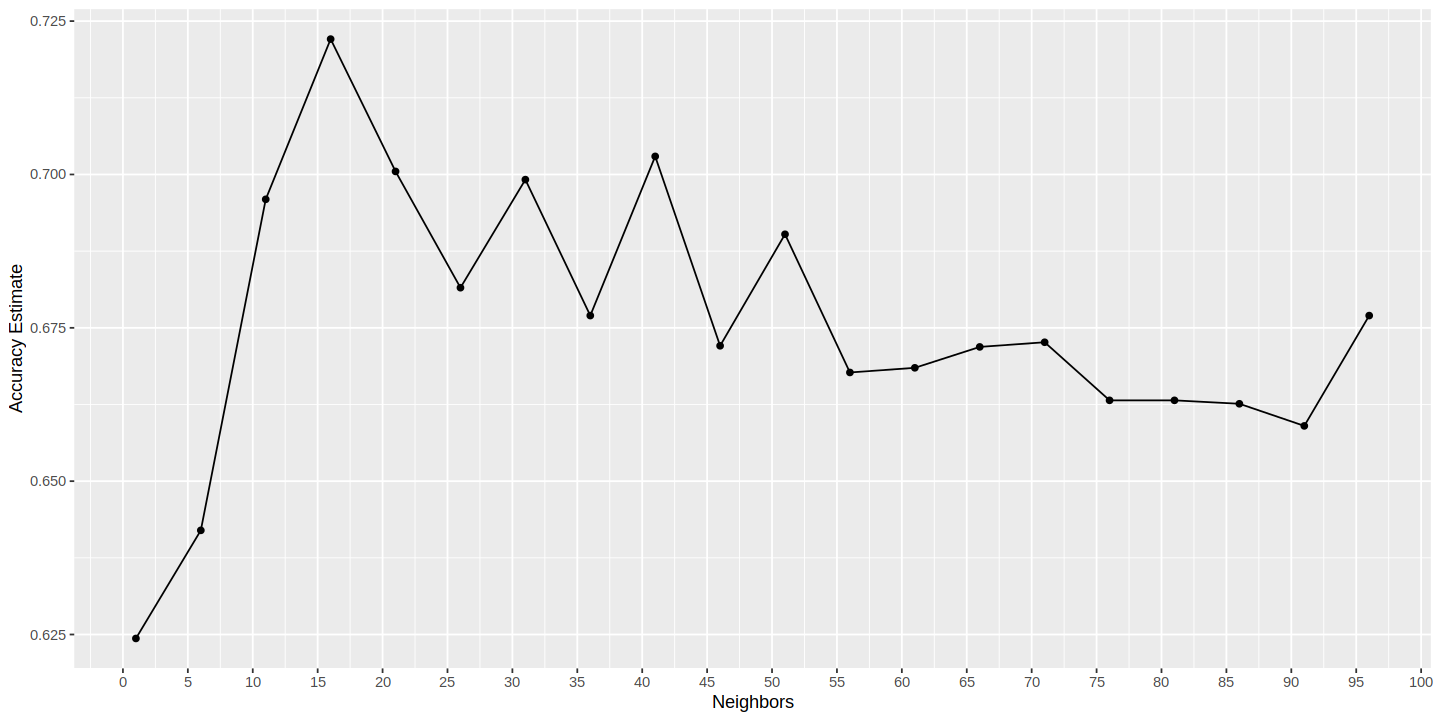

In [79]:
accuracy_v_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 100, by = 5)) 
accuracy_v_k

### Building the Model

In [80]:
set.seed(2)

model_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 16) |>
    set_engine("kknn") |>
    set_mode("classification")
model_spec
model_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(model_spec) |>
    fit(data = heart_training)
model_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 16
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(16,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3274336
Best kernel: rectangular
Best k: 16

In [81]:
set.seed(2)

model_predictions <- predict(model_fit, heart_testing) |>
    bind_cols(heart_testing) 
head(model_predictions) 

model_metrics <- model_predictions |>
    metrics(truth = diagnosis, estimate = .pred_class) |>
    filter(.metric == "accuracy")
model_metrics

model_conf_mat <- model_predictions |>
    conf_mat(truth = diagnosis, estimate = .pred_class)
model_conf_mat

.pred_class,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,diagnosis
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
FALSE,37,1,3,130,250,0,0,187,0,3.5,3,0,FALSE
FALSE,56,1,2,120,236,0,0,178,0,0.8,1,0,FALSE
FALSE,57,0,4,120,354,0,0,163,1,0.6,1,0,FALSE
TRUE,57,1,4,140,192,0,0,148,0,0.4,2,0,FALSE
TRUE,56,1,3,130,256,1,2,142,1,0.6,2,2,TRUE
FALSE,44,1,2,120,263,0,0,173,0,0.0,1,0,FALSE


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7272727


          Truth
Prediction FALSE TRUE
     FALSE    30   11
     TRUE     10   26

### Visualizing the results

### Testing the classifier 

## Discussion

## References

1.
2. https://www.nia.nih.gov/health/heart-health/heart-health-and-aging
3. 